In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
boston = tf.keras.datasets.boston_housing

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
(b_train, b_train),(b_test, b_test) = boston.load_data()

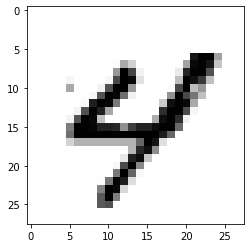

In [ ]:
plt.imshow(x_train[89], cmap=plt.cm.binary)
plt.show()

In [ ]:
x_train = keras.utils.normalize(x_train, axis=1)
x_test = keras.utils.normalize(x_test, axis=1)

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
model = keras.models.Sequential()

In [ ]:
model.add(keras.layers.Flatten())

In [ ]:
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2497 - accuracy: 0.9248
Epoch 2/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1040 - accuracy: 0.9677
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0722 - accuracy: 0.9776


In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0933 - accuracy: 0.9713
0.09325211495161057
0.9713000059127808


In [ ]:
pred = model.predict(x_test)

In [ ]:
pred

array([[1.41336457e-07, 1.59051279e-08, 9.82632264e-05, ...,
        9.99895811e-01, 7.35507033e-09, 1.61035450e-06],
       [5.20984088e-07, 1.44775977e-05, 9.99975204e-01, ...,
        2.33998989e-07, 1.64523080e-08, 1.41286882e-09],
       [7.37363621e-07, 9.99831319e-01, 5.73507077e-06, ...,
        2.86930263e-05, 2.11630249e-05, 2.79247661e-06],
       ...,
       [4.20784463e-10, 1.93184647e-07, 1.89874338e-08, ...,
        3.82488111e-07, 9.18761458e-08, 3.99076725e-06],
       [2.03066808e-08, 4.39657519e-08, 2.21001059e-07, ...,
        5.08630728e-06, 3.50008595e-05, 9.65111084e-08],
       [2.16900759e-07, 7.65508812e-09, 2.73067844e-08, ...,
        1.09233955e-10, 1.61915551e-07, 4.39869829e-09]], dtype=float32)

In [ ]:
import numpy as np

In [ ]:
print(np.argmax(pred[0]))

7


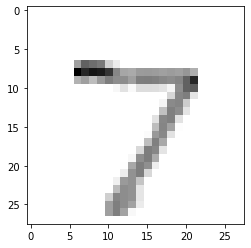

In [ ]:
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [31]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
len(X_train)

60000

In [6]:
x_train, x_val_test, y_train, y_val_test = train_test_split( X_train[:5000]/255.0 , Y_train[:5000]/255.0 , test_size=0.2, random_state=42)

In [7]:
class_names = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'boot']

In [8]:
x_train[0].shape

(28, 28)

In [ ]:
for n in range(2):
  plt.figure()
  print(class_names[Y_train[n]])
  plt.imshow(X_train[n], cmap='gray')

In [10]:
model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(300, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.layers[1]

In [13]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [14]:
model.get_layer('dense') is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()
weights

In [ ]:
biases

In [17]:
weights.shape

(784, 300)

In [18]:
biases.shape

(300,)

In [19]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='sgd', metrics = ['accuracy'])

In [32]:
X_val, X_train = X_train[:5000]/255.0 , X_train[5000:]/255.0
y_val, y_train = Y_train[:5000], Y_train[5000:]

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

In [34]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

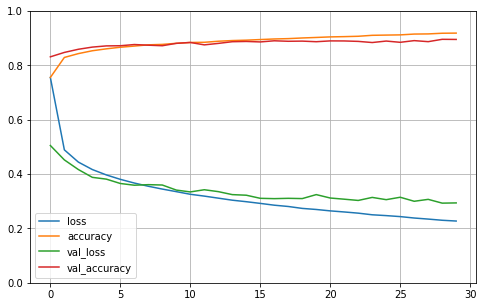

In [35]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [36]:
# Run .fit again to further train the model
history1 = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2237 - accuracy: 0.9203 - val_loss: 0.2965 - val_accuracy: 0.8946
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2199 - accuracy: 0.9215 - val_loss: 0.2965 - val_accuracy: 0.8952
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2153 - accuracy: 0.9226 - val_loss: 0.2929 - val_accuracy: 0.8934
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2121 - accuracy: 0.9250 - val_loss: 0.3012 - val_accuracy: 0.8922
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2094 - accuracy: 0.9249 - val_loss: 0.2953 - val_accuracy: 0.8942
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2058 - accuracy: 0.9259 - val_loss: 0.2901 - val_accuracy: 0.8952
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2027 - accuracy: 0.9279 - val_loss: 0.3136 - val_accuracy:

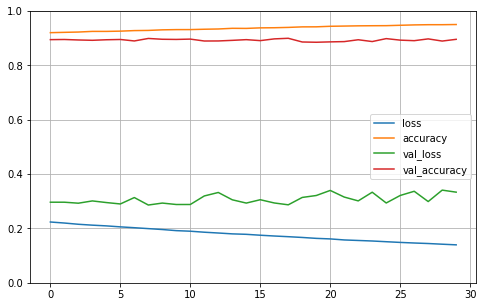

In [37]:
pd.DataFrame(history1.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [39]:
model.evaluate(X_test, Y_test)
# test loss, test acc:

313/313 [==============================] - 1s 2ms/step - loss: 96.4328 - accuracy: 0.8289


[96.43280029296875, 0.8288999795913696]

In [43]:
X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob.round(3)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [44]:
y_pred = model.predict_classes(X_new)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [46]:
print(y_pred)
for n in y_pred:
  print(class_names[n])

[9 2 1]
boot
pullover
trouser


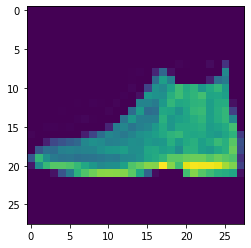

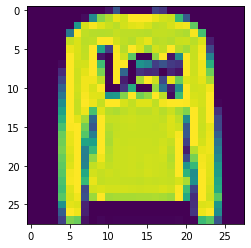

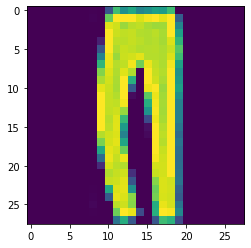

In [47]:
for n in X_test[:3]:
  plt.figure()
  plt.imshow(n)